In [39]:
using Distributions
using MultivariateStats
using PyPlot
include("../multiallelegibbs.jl");
include("../singleallelesampler.jl");

INFO: Loading help data...


In [66]:
init = 20;
ngen = 3;
popcap=60;
ped = pedigree_pedsim(init,ngen,popcap);

In [67]:
n = size(ped)[1];
m = 50;
geno = Array(Int64,(n,m));
maf = rand(m)/2.5 + .1;
for i in 1:m
    geno[:,i] = pedigree_genosim(ped,maf[i])[1];
end

In [68]:
genobs = Array(Int64,(n,m));
genobs[:,:] = geno;
genobs[1:(n-popcap),:] = -1;

genobs_norm = genobs[(n-popcap+1):n,:];
genobs_norm = (genobs_norm .- mean(genobs_norm,1))./std(genobs_norm,1);

In [87]:
gpca = fit(PCA,float(genobs_norm'),pratio=1.0)

PCA(indim = 50, outdim = 50, principalratio = 1.00000)

In [86]:
simgeno = Array(Int64,size(genobs_norm));
simgeno_norm = Array(Float64,size(genobs_norm));
for i in 1:m
    simgeno[:,i] = rand(Binomial(2,maf[i]),size(genobs_norm)[1]);
    simgeno_norm[:,i] = (simgeno[:,i].-mean(simgeno[:,i]))./std(simgeno[:,i]);
end
simpca = fit(PCA,float(simgeno_norm'),pratio=1.0)

PCA(indim = 50, outdim = 50, principalratio = 1.00000)

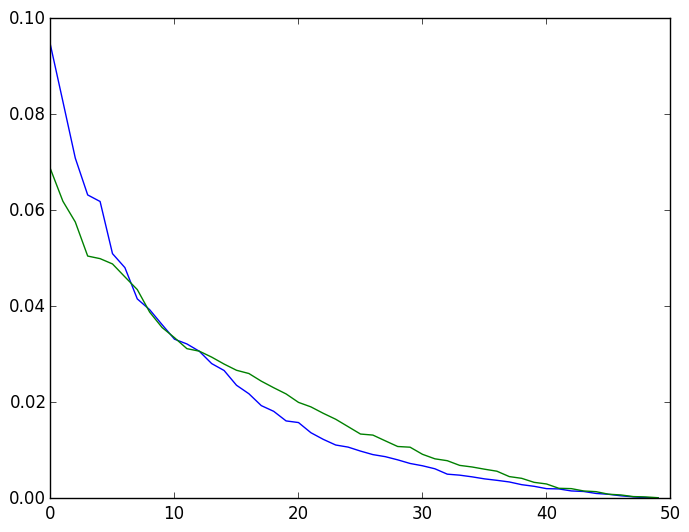

In [93]:
foo =[principalvars(gpca)/sum(principalvars(gpca)) principalvars(simpca)/sum(principalvars(simpca))];
PyPlot.plot(foo);